In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Qual a idade média das pessoas no cadastro ? <br>
Quantos homens tem no cadastro ? <br>
Quantas mulheres tem no cadastro ? <br>
Qual a idade média dos homens e das mulheres ? <br>
Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro ? <br>
Mostre a Média Salarial do cadastro ? <br>
Quem tem o maior salário ? <br>
Tirando desempregado quem recebe menos ? <br>
Quantas pessoas gostam de caminhar no final de semana ? <br>
Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte ? <br>
Crie um mapa de calor ? <br>
Mostre de forma gráfica a distribuição de estados do cadastro ? <br>

In [3]:
#lendo arquivo de cadastro
df_cadastro = pd.read_csv('cadastro.csv')
#Lendo arquivo de gasolina
df_gasolina = pd.read_csv('preco_gasolina.csv')
#Lendo arquivo de salarios
df_salarios = pd.read_csv('salario_profissoes.csv')


#Tratamento dos dados
#df_cadastro.isnull().sum()
df_cadastro['quantidade'] = 1
df_cadastro['idade'] = 2020 - df_cadastro['ano_nascimento']

#Tratamento de Escolaridade
df_cadastro["escolaridade"].loc[df_cadastro["escolaridade"] == "ensino médio"] = "Ensino Médio"
df_cadastro["escolaridade"].loc[df_cadastro["escolaridade"] == "ensino Médio"] = "Ensino Médio"
df_cadastro["escolaridade"].loc[df_cadastro["escolaridade"] == "ensino superior"] = "Ensino Superior"
df_cadastro["escolaridade"].loc[df_cadastro["escolaridade"] == "Ensimo Tecnico"] = "Ensino Tecnico"

In [4]:
#Media das idades
print("A media das idades é:",round(df_cadastro['idade'].sum() / df_cadastro['quantidade'].sum(),2))

A media das idades é: 32.73


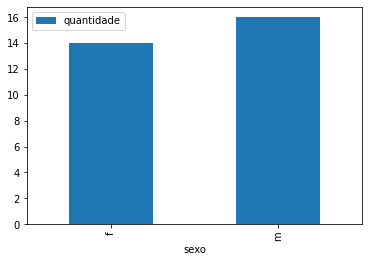

In [5]:
#exibindo o numero de mulheres e homens 
df_cadastro[['sexo','quantidade']].groupby('sexo').sum().plot(kind="bar")

In [6]:
#Media das idades
#df_cadastro['idade'].sum() / df_cadastro['quantidade'].sum()
df_media = df_cadastro[['sexo','idade','quantidade']].groupby('sexo').sum()
df_media['idade'] / df_media['quantidade']

sexo
f    33.857143
m    31.750000
dtype: float64

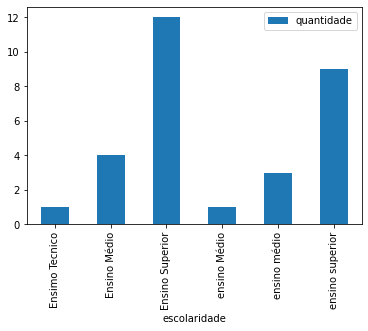

In [7]:
#Distribuição escolaridade
df_cadastro[['escolaridade','quantidade']].groupby('escolaridade').sum().plot(kind="bar")

In [8]:
#Gera o data frame com merge
df_cadastro_salarios = df_cadastro.merge(df_salarios, left_on='profissão', right_on='Profissões')
#Inserindo o valor do salario atual para quem tem menos que 3 anos de experiencia
df_cadastro_salarios["salario_atual"] = df_cadastro_salarios["salario até 3 anos"].loc[df_cadastro_salarios["experiencia profissional"] <= 3]
#Inserindo o valor do salario atual para quem tem mais que 3 anos de experiencia
df_cadastro_salarios['salario_atual'] = df_cadastro_salarios['salario_atual'].fillna(df_cadastro_salarios["salaior +3 anos"])

#Media do salarios
print("A media dos salarios é:",round(df_cadastro_salarios['salario_atual'].sum() / df_cadastro['quantidade'].sum(),2))

A media dos salarios é: 4463.33


In [9]:
#Maior salario
max_salario = max(df_cadastro_salarios["salario_atual"])
df_cadastro_salarios.loc[df_cadastro_salarios["salario_atual"] == max_salario]

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,...,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,quantidade,idade,Profissões,salario até 3 anos,salaior +3 anos,salario_atual
9,Mirtes,NaN,1976,f,Vitoria,Médica,5,Casada,2,leitura e ficar com os filhos,...,crossfit,3.0,sim,Ensino Superior,1,44,Médica,12000,20000,20000.0


In [10]:
#Menor salario
min_salario = min(df_cadastro_salarios["salario_atual"].loc[df_cadastro_salarios["salario_atual"] > 0])
df_cadastro_salarios.loc[df_cadastro_salarios["salario_atual"] == min_salario]

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,...,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,quantidade,idade,Profissões,salario até 3 anos,salaior +3 anos,salario_atual
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,...,-,0.0,não,Ensino Médio,1,50,dona de casa,1200,1200,1200.0
6,Vilma,Narsiza,1995,f,Minas Gerais,caixa de mercado,4,Solteira,4,barzinho com os amigos,...,crossfit,3.0,não,Ensino Médio,1,25,caixa de mercado,900,1200,1200.0


In [21]:
#Listando as pessoas que caminham aos fins de semana
num_pessoas_caminham = df_cadastro["lazer_final_de_semana"][df_cadastro['lazer_final_de_semana'].str.contains("caminhar")].count()
print("O numero de pessoas que gostam de caminhar aos fins de semana é", num_pessoas_caminham)

O numero de pessoas que gostam de caminhar aos fins de semana é 4


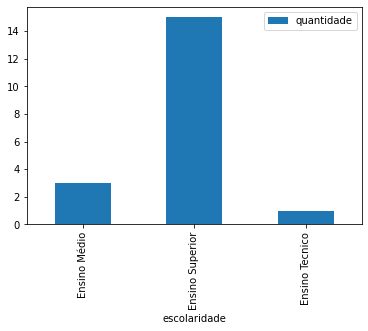

In [68]:
#Escolaridade x Pratica esporte 
df_cadastro[['pratica_esporte','escolaridade','quantidade']].loc[df_cadastro["pratica_esporte"] == 'sim'].groupby('escolaridade').sum().plot(kind="bar")

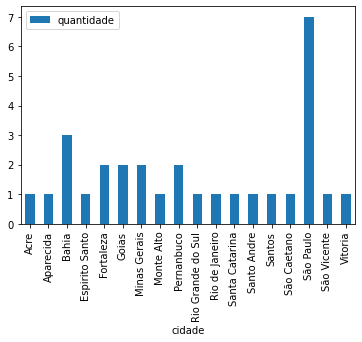

In [70]:
#Distribuição cidade
df_cadastro[['cidade','quantidade']].groupby('cidade').sum().plot(kind="bar")

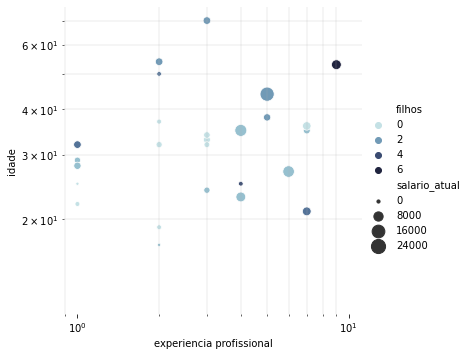

In [108]:
#Mapa Calor
import seaborn as sns

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_cadastro_salarios,
    x="experiencia profissional", y="idade",
    hue="filhos", size="salario_atual",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)